In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
#fString = "./filterWheel_GainCalibration/minusPoint2_Calo3.root"
#fString = "./filterWheel_GainCalibration/plusPoint2_Calo15_20.root"
fString = "./data/gm2offline_full.root"
#fString = "../nearline/calo11xtal18/weird_islands_calo11_xtal18.root"
f = r.TFile(fString)
f.ls()

TFile**		./data/gm2offline_full.root	
 TFile*		./data/gm2offline_full.root	
  KEY: TDirectoryFile	fwAnalysis;1	fwAnalysis (FWAnalysis) folder
  KEY: TDirectoryFile	islandFits1;1	islandFits1 (IslandFitDisplayTree) folder
  KEY: TDirectoryFile	islandFits2;1	islandFits2 (IslandFitDisplayTree) folder
  KEY: TDirectoryFile	islandFits3;1	islandFits3 (IslandFitDisplayTree) folder
  KEY: TDirectoryFile	islandFits4;1	islandFits4 (IslandFitDisplayTree) folder
  KEY: TDirectoryFile	islandFits5;1	islandFits5 (IslandFitDisplayTree) folder
  KEY: TDirectoryFile	islandFits6;1	islandFits6 (IslandFitDisplayTree) folder
  KEY: TDirectoryFile	islandFits7;1	islandFits7 (IslandFitDisplayTree) folder
  KEY: TDirectoryFile	islandFits8;1	islandFits8 (IslandFitDisplayTree) folder
  KEY: TDirectoryFile	islandFits9;1	islandFits9 (IslandFitDisplayTree) folder
  KEY: TDirectoryFile	islandFits10;1	islandFits10 (IslandFitDisplayTree) folder
  KEY: TDirectoryFile	islandFits11;1	islandFits11 (IslandFitDisplayTree) fol

In [5]:
calo = 11
f.cd("islandFits"+str(calo)+"/splines")
#f.ls()

t = f.Get("islandFits"+str(calo)).Get("fits").Get("fitTree")

In [147]:
#calo = 3
xtal = 11
#fillNum = 6

#create the string to cut on 
cutString = ("caloNum == "+str(calo)
              +" && xtalNum == "+str(xtal)
              #+" && fillNum == "+str(fillNum)
              #+" && chi2 < 100"
            )

[2.0, 2.0, 4.0, 4.0, 4.0, 6.0, 6.0, 8.0, 8.0, 10.0, 10.0, 10.0]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


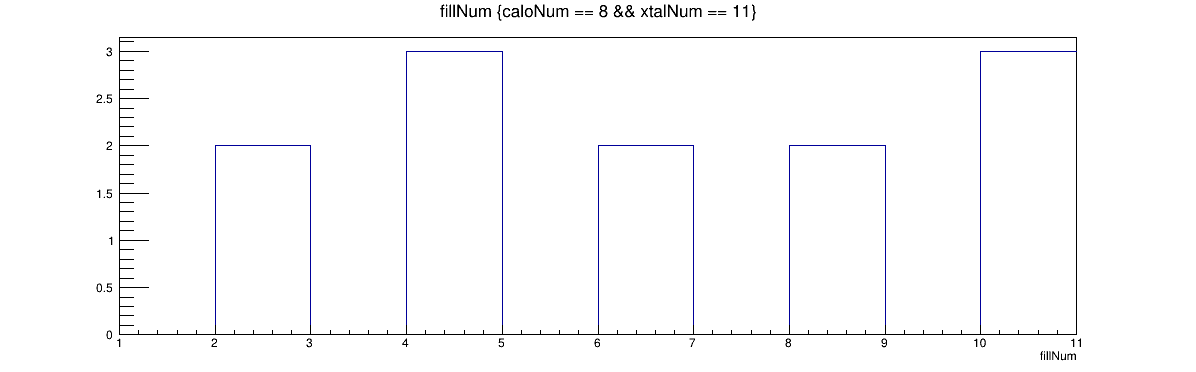

In [148]:
c = r.TCanvas("c","c",1200,400)
ding = t.Draw("fillNum",cutString,"colz")
print([t.GetV1()[i] for i in range(ding)])
c.Draw()

In [149]:
fillNum = 4
cutString += " && fillNum == "+str(fillNum)

In [150]:
print(cutString)

caloNum == 8 && xtalNum == 11 && fillNum == 4


In [151]:
numberOfIslands = t.Draw("islandNums", cutString,"goff")
#get islandNums
islandNums = [int(t.GetV1()[x]) for x in range(numberOfIslands)]
print(numberOfIslands, islandNums)

102 [41, 51, 64, 69, 43, 56, 74, 66, 59, 49, 53, 55, 48, 39, 22, 58, 57, 47, 20, 63, 45, 52, 37, 61, 40, 29, 46, 62, 44, 54, 23, 19, 2, 25, 15, 31, 17, 27, 28, 21, 1, 38, 68, 35, 67, 26, 65, 14, 11, 42, 60, 13, 70, 32, 16, 50, 71, 30, 36, 34, 18, 33, 5, 12, 6, 8, 0, 3, 9, 10, 7, 4, 24, 72, 85, 81, 76, 83, 77, 87, 75, 73, 86, 80, 94, 92, 91, 100, 95, 93, 89, 88, 98, 90, 79, 82, 97, 99, 78, 96, 84, 101]


In [152]:
t.Draw("subRunNum",cutString,"goff")
subrun = int(t.GetV1()[0])
print("Subrun", subrun)
n_entries = t.BuildIndex('fillNum*(subRunNum=={})'.format(subrun),
                         'islandNums[0]*(xtalNum == 0 && subRunNum == {}) - 1*(xtalNum!=0)'.format(subrun))

Subrun 10


In [153]:
entries = []
print(islandNums)
for island in islandNums:
    entry_num = t.GetEntryNumberWithIndex(fillNum, island) 
    print(island, entry_num)
    if(entry_num > -0.01):
        entries.append(entry_num + xtal)
print(entries)

[41, 51, 64, 69, 43, 56, 74, 66, 59, 49, 53, 55, 48, 39, 22, 58, 57, 47, 20, 63, 45, 52, 37, 61, 40, 29, 46, 62, 44, 54, 23, 19, 2, 25, 15, 31, 17, 27, 28, 21, 1, 38, 68, 35, 67, 26, 65, 14, 11, 42, 60, 13, 70, 32, 16, 50, 71, 30, 36, 34, 18, 33, 5, 12, 6, 8, 0, 3, 9, 10, 7, 4, 24, 72, 85, 81, 76, 83, 77, 87, 75, 73, 86, 80, 94, 92, 91, 100, 95, 93, 89, 88, 98, 90, 79, 82, 97, 99, 78, 96, 84, 101]
41 108
51 162
64 -1
69 -1
43 -1
56 -1
74 -1
66 -1
59 -1
49 -1
53 -1
55 -1
48 -1
39 -1
22 -1
58 -1
57 -1
47 -1
20 -1
63 -1
45 -1
52 -1
37 -1
61 -1
40 -1
29 -1
46 -1
62 -1
44 -1
54 -1
23 -1
19 -1
2 -1
25 -1
15 -1
31 -1
17 -1
27 -1
28 -1
21 -1
1 -1
38 -1
68 -1
35 -1
67 -1
26 -1
65 -1
14 -1
11 -1
42 -1
60 -1
13 -1
70 -1
32 -1
16 -1
50 -1
71 -1
30 -1
36 -1
34 -1
18 -1
33 -1
5 -1
12 -1
6 -1
8 -1
0 -1
3 -1
9 -1
10 -1
7 -1
4 -1
24 -1
72 -1
85 -1
81 -1
76 -1
83 -1
77 -1
87 -1
75 -1
73 -1
86 -1
80 -1
94 -1
92 -1
91 -1
100 -1
95 -1
93 -1
89 -1
88 -1
98 -1
90 -1
79 -1
82 -1
97 -1
99 -1
78 -1
96 -1
84 -1


In [154]:
islandLengths = []
energies = []
pedestals = []
islandNums = []
chiSquare = []
statuses = []
laserHits = []
times = []
firstSamples = []
traces = []
graphs = []

for entry in entries:
    t.GetEntry(entry)

    islandLengths.append(t.islandLengths[0])
    energies.append([x for x in t.energies])
    pedestals.append(t.pedestal)
    islandNums.append(t.islandNums[0])
    chiSquare.append(t.chi2)
    statuses.append([x for x in t.statuses])
    laserHits.append([x for x in t.laserHits])
    times.append([x for x in t.times])
    firstSamples.append(t.firstSampleNums[0])
    traces.append( [x for x in t.trace] )

for i, trace in enumerate(traces):
    gri = r.TGraph()
    for j, ti in enumerate(trace):
        gri.SetPoint(j, j, ti)
    gri.SetMarkerSize(0.6)
    gri.SetMarkerStyle(8)
    gri.SetTitle("Trace: Calo "+str(calo)+", Xtal "+str(xtal)+" in Fill "+str(fillNum)+", Island "+str(islandNums[i])
                 +"; Sample Number; Amplitude [ADC Units]")
    graphs.append(gri)
#print(graphs)
    

In [155]:
print(islandLengths)
print(energies)
print(pedestals)
print(islandNums)
print(chiSquare)
print(statuses)
print(laserHits)
print(times)
print(firstSamples)
print(graphs)

[39, 40, 40]
[[6743.042531407564], [6680.817565762801, 6937.061769677689, 6733.041783920934, 6727.701022250626, 7039.826399663909, 6648.098621892363, 6969.375543899636, 6496.330948379658, 7268.046785494505, 6470.385884767891, 6733.912147132179, 6510.481239500132, 6770.375433098272, 6948.889600919113, 6918.481392557581, 6932.370879586459, 6814.888077353621, 6898.95361915048, 6741.531014906001, 6856.213383479275, 6675.323242276443, 6579.189642591705, 6562.3760222705705, 6616.223290121997, 6664.663477404204, 6772.966897733161, 6734.37135999581, 6777.788122731569, 6674.061493245971, 6959.228383962931, 6574.756060941698, 6482.862766285857, 6618.752182509094, 6723.170891936637, 6511.28441521698, 6647.043677431716, 6608.366689155626, 6426.126506316778, 6502.47570768527, 6592.390756551572, 6898.681280300863, 6302.517330593443, 6410.242079088843, 6865.889998984394, 6294.646566854512, 6299.451056131566, 6430.531399339411, 7017.976926812743, 6697.445376482255, 6845.9280795340765, 6667.67353946620

In [156]:
spline = f.Get("islandFits"+str(calo)+"").Get("splines").Get("laser"+str(xtal))
beamspline = f.Get("islandFits"+str(calo)+"").Get("splines").Get("beam"+str(xtal))
print(spline)

<ROOT.TSpline3 object ("laser11") at 0x7fffbe5e35f0>


In [157]:
print(times)
print(firstSamples)

[[5594.412595173367], [23874.03711729236, 23970.019759093204, 24066.011798439653, 24162.021126862113, 24258.00806630869, 24354.04386000045, 24450.003312972, 24545.983051939736, 24641.999971901878, 24737.987889808137, 24833.980205047872, 24929.987404845393, 25026.011115021807, 25122.009777073476, 25217.991511958608, 25313.995328186367, 25409.993659623142, 25505.97179859726, 25601.97650875812, 25697.983856817802, 25793.959945730632, 25889.90296171582, 25985.948913931963, 26081.919493439244, 26177.949414533014, 26273.940309813242, 26369.95036149981, 26465.93206353556, 26561.9279745229, 26657.933965493477, 26753.90884621996, 26849.885219461754, 26945.90158920984, 27041.90675060464, 27137.91272471543, 27233.907945688086, 27329.891017431524, 27425.889269662082, 27521.900097373757, 27617.873470933464, 27713.866939763, 27809.909565386595, 27905.899587405365, 28001.881826460503, 28097.8648293864, 28193.824871526678, 28289.876219541286, 28385.880343111698, 28481.87204665114, 28577.850918368495, 

In [158]:
whichGraph = 0
splineGraphs = []
for whichGraph in range(len(traces)):

    splineGraphsi = []
    allSplineScaled = []
    
    for fiti in range(len(times[whichGraph])):
        splineScaled = []
        offset = times[whichGraph][fiti] - firstSamples[whichGraph]
        print(offset)
        for i in range(len(traces[whichGraph])):
            splineScaled.append( spline.Eval(i - offset)*energies[whichGraph][fiti] + pedestals[whichGraph] )
        #print(splineScaled)
        allSplineScaled.append(splineScaled)

        splineGraph = r.TGraph()
        for i, si in enumerate(splineScaled):
            splineGraph.SetPoint(i, i, si)
        splineGraph.SetLineColor(fiti+2)
        splineGraphsi.append(splineGraph)
        
    if( len(times[whichGraph]) > 1):
        splineGraph = r.TGraph()
        totalSpline = [pedestals[whichGraph] for x in range(len(allSplineScaled[0]))]
        for i, si in enumerate(allSplineScaled):
            for ii, sii in enumerate(si):
                totalSpline[ii] += sii - pedestals[whichGraph]
                
        for i, si in enumerate(totalSpline):
            splineGraph.SetPoint(i, i, si )
            
        splineGraph.SetLineColor(9)
        splineGraphsi.append(splineGraph)
    
    splineGraphs.append(splineGraphsi)

12.412595173366753
13.037117292358744
109.0197590932039
205.01179843965292
301.0211268621133
397.0080663086883
493.04386000044906
589.0033129719995
684.9830519397365
780.9999719018779
876.987889808137
972.980205047872
1068.987404845393
1165.0111150218072
1261.0097770734756
1356.9915119586076
1452.9953281863673
1548.9936596231419
1644.9717985972602
1740.9765087581218
1836.983856817802
1932.9599457306322
2028.9029617158194
2124.948913931963
2220.9194934392435
2316.9494145330136
2412.9403098132425
2508.9503614998102
2604.9320635355616
2700.9279745228996
2796.9339654934774
2892.9088462199616
2988.885219461754
3084.9015892098396
3180.9067506046413
3276.9127247154283
3372.9079456880863
3468.8910174315242
3564.8892696620824
3660.9000973737566
3756.873470933464
3852.866939763
3948.909565386595
4044.8995874053653
4140.881826460503
4236.864829386399
4332.824871526678
4428.8762195412855
4524.880343111698
4620.87204665114
4716.850918368495
4812.832825895417
4908.845965736935
5004.816874418408
5100

In [159]:
print(splineGraphs)

[[<ROOT.TGraph object at 0x7fffbe5e3540>], [<ROOT.TGraph object at 0x7fffc1916f10>, <ROOT.TGraph object at 0x7fffc1aa7a50>, <ROOT.TGraph object at 0x7fffc1b58020>, <ROOT.TGraph object at 0x7fffc1ab5fa0>, <ROOT.TGraph object at 0x7fffc1c55ff0>, <ROOT.TGraph object at 0x7f3191209c10>, <ROOT.TGraph object at 0x7fffc1949e60>, <ROOT.TGraph object at 0x7fffc1d59c30>, <ROOT.TGraph object at 0x7fffc1aeb3a0>, <ROOT.TGraph object at 0x7fffc19cb290>, <ROOT.TGraph object at 0x7fffc19cb3c0>, <ROOT.TGraph object at 0x7f316d240500>, <ROOT.TGraph object at 0x7f316d2406a0>, <ROOT.TGraph object at 0x7fffc1b54bf0>, <ROOT.TGraph object at 0x7fffc1b54d90>, <ROOT.TGraph object at 0x7fffc1c36720>, <ROOT.TGraph object at 0x7fffc1c368c0>, <ROOT.TGraph object at 0x7fffc1c1e3b0>, <ROOT.TGraph object at 0x7fffc1c555a0>, <ROOT.TGraph object at 0x7fffc1c55740>, <ROOT.TGraph object at 0x7fffc206ca70>, <ROOT.TGraph object at 0x7fffc206cc10>, <ROOT.TGraph object at 0x7f31911f15e0>, <ROOT.TGraph object at 0x7f31911f178

In [160]:
print(pedestals)
print(energies)

[-1769.3130478844437, -1788.3088008338314, -1772.1904047634587]
[[6743.042531407564], [6680.817565762801, 6937.061769677689, 6733.041783920934, 6727.701022250626, 7039.826399663909, 6648.098621892363, 6969.375543899636, 6496.330948379658, 7268.046785494505, 6470.385884767891, 6733.912147132179, 6510.481239500132, 6770.375433098272, 6948.889600919113, 6918.481392557581, 6932.370879586459, 6814.888077353621, 6898.95361915048, 6741.531014906001, 6856.213383479275, 6675.323242276443, 6579.189642591705, 6562.3760222705705, 6616.223290121997, 6664.663477404204, 6772.966897733161, 6734.37135999581, 6777.788122731569, 6674.061493245971, 6959.228383962931, 6574.756060941698, 6482.862766285857, 6618.752182509094, 6723.170891936637, 6511.28441521698, 6647.043677431716, 6608.366689155626, 6426.126506316778, 6502.47570768527, 6592.390756551572, 6898.681280300863, 6302.517330593443, 6410.242079088843, 6865.889998984394, 6294.646566854512, 6299.451056131566, 6430.531399339411, 7017.976926812743, 6697

In [161]:
textBoxes = []
for i in range(len(traces)):
    pt = r.TPaveText(0.45,0.45,0.87,0.87,"ndc");
    for j in range(len(energies[i])):
        pt.AddText("E_{0} = "+str(round(energies[i][j],2)))
        pt.AddText("t_{0} = "+str(round(times[i][j],2)))
        pt.AddText("Pedestal = "+str(pedestals[i]))
        pt.AddText("Status = "+str(statuses[i]))
        pt.AddText("Laser Hit = "+str(laserHits[i][j]))
        pt.AddText("#chi^{2} = "+str(round(chiSquare[i],2)))
        pt.AddText(" ")
        pt.AddLine()
    
    textBoxes.append(pt)
print(textBoxes)

[<ROOT.TPaveText object ("TPave") at 0x7fffc10dc480>, <ROOT.TPaveText object ("TPave") at 0x7fffc19554d0>, <ROOT.TPaveText object ("TPave") at 0x7fffc1cdcf90>]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


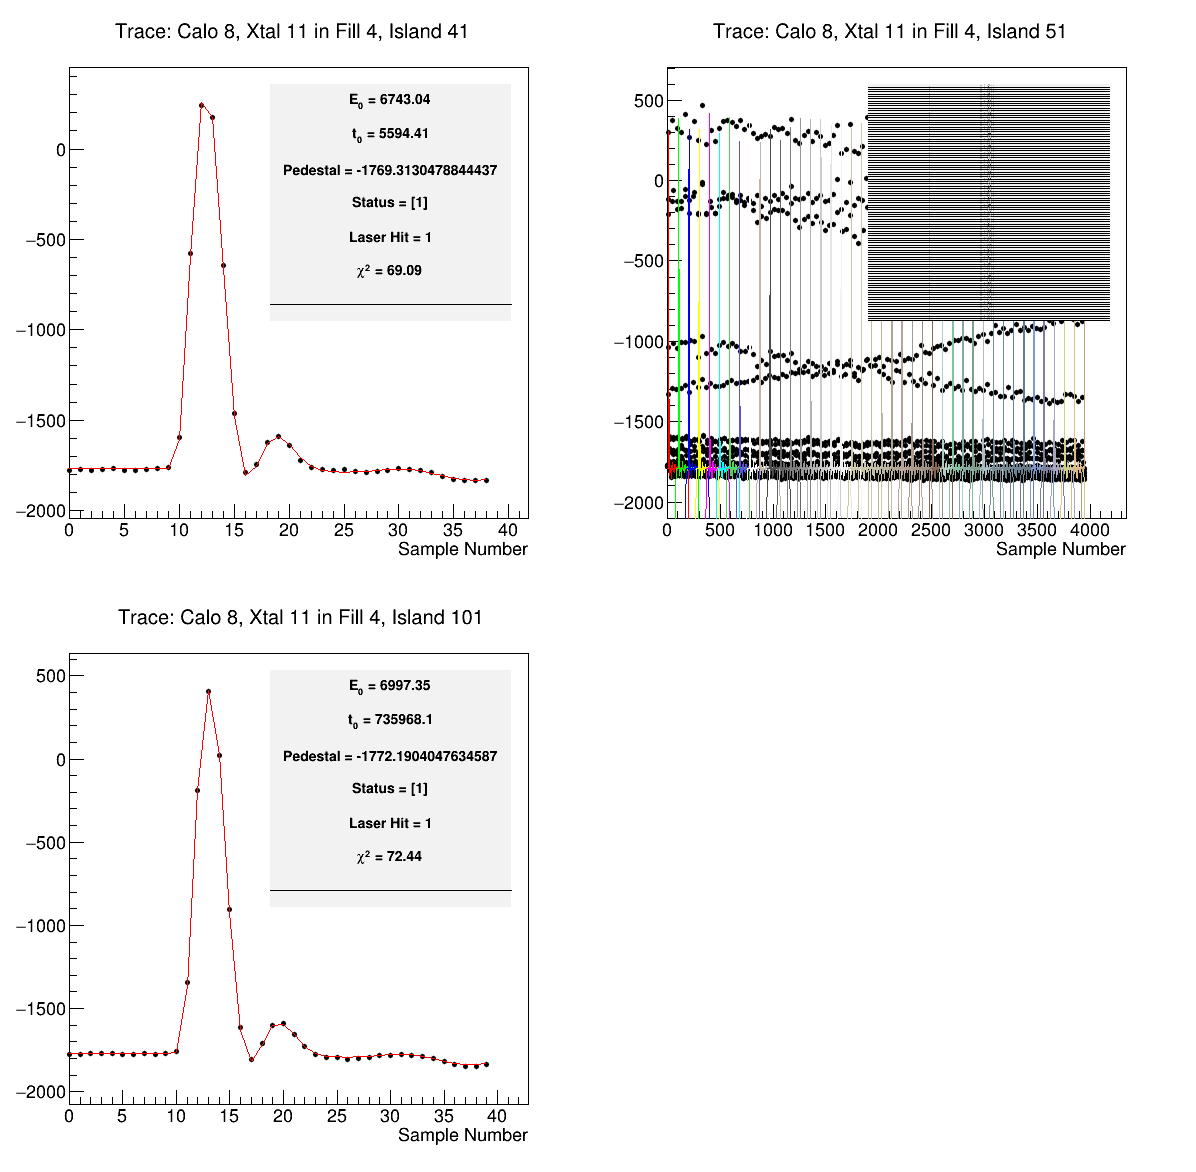

In [162]:
c = r.TCanvas("c","c", int(np.ceil((len(traces)/2)))*600, 2*600)
c.Divide(int(np.ceil((len(traces)/2))), 2)
for i in range(len(traces)):
    c.cd(i+1)
    graphs[i].Draw("ap")
    for si in splineGraphs[i]:
        si.Draw("l same")
    textBoxes[i].Draw("SAME")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


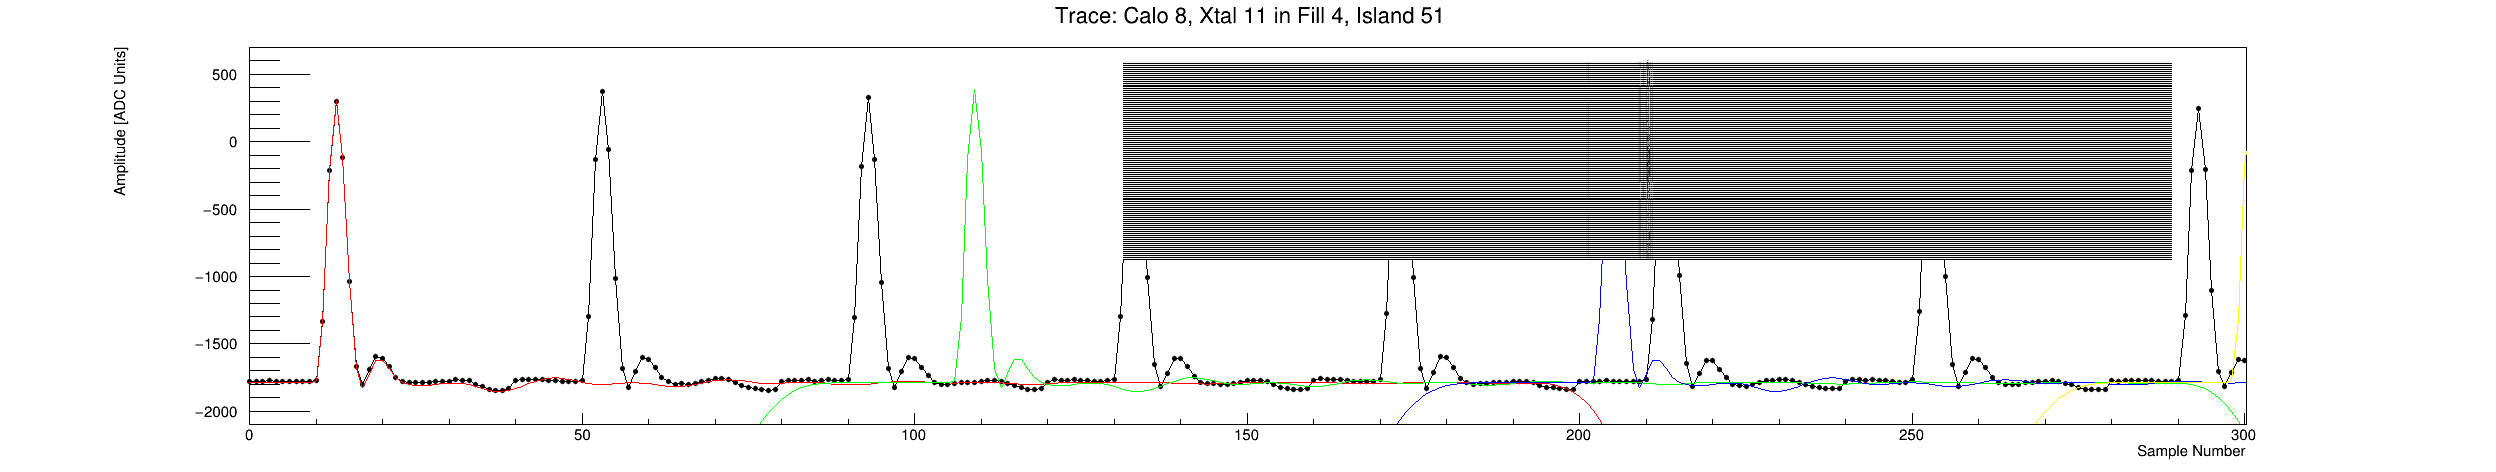

In [163]:
i = 1
c = r.TCanvas("c","c",2500,500)
graphs[i].Draw("apl")
graphs[i].GetXaxis().SetRangeUser(0,300)
for si in splineGraphs[i]:
    si.Draw("l same")
textBoxes[i].Draw("SAME")
c.Draw()

In [3]:
def plotAllFits( f, t, calo, xtal, fillNum, subrun):
    
    #create the string to cut on 
    cutString = ("caloNum == "+str(calo)
                  +" && xtalNum == "+str(xtal)
                  +" && fillNum == "+str(fillNum)
                  #+" && chi2 < 100"
                )
    
    numberOfIslands = t.Draw("islandNums", cutString,"goff")
    #get islandNums
    islandNums = [int(t.GetV1()[x]) for x in range(numberOfIslands)]
    print(numberOfIslands, islandNums)
    
    #t.Draw("subRunNum",cutString,"goff")
    #subrun = int(t.GetV1()[0])
    print("Subrun", subrun)
    n_entries = t.BuildIndex('fillNum*(subRunNum=={})'.format(subrun),
                             'islandNums[0]*(xtalNum == 0 && subRunNum == {}) - 1*(xtalNum!=0)'.format(subrun))
    
    entries = []
    print(islandNums)
    for island in islandNums:
        entry_num = t.GetEntryNumberWithIndex(fillNum, island) 
        #print(island, entry_num)
        if(entry_num > -0.01):
            entries.append(entry_num + xtal)
    print(entries)
    
    islandLengths = []
    energies = []
    pedestals = []
    islandNums = []
    chiSquare = []
    statuses = []
    laserHits = []
    times = []
    firstSamples = []
    traces = []
    graphs = []

    for entry in entries:
        t.GetEntry(entry)

        islandLengths.append(t.islandLengths[0])
        energies.append([x for x in t.energies])
        pedestals.append(t.pedestal)
        islandNums.append(t.islandNums[0])
        chiSquare.append(t.chi2)
        statuses.append([x for x in t.statuses])
        laserHits.append([x for x in t.laserHits])
        times.append([x for x in t.times])
        firstSamples.append(t.firstSampleNums[0])
        traces.append( [x for x in t.trace] )

    for i, trace in enumerate(traces):
        gri = r.TGraph()
        for j, ti in enumerate(trace):
            gri.SetPoint(j, j, ti)
        gri.SetMarkerSize(0.6)
        gri.SetMarkerStyle(8)
        gri.SetTitle("Trace: Calo "+str(calo)+", Xtal "+str(xtal)+" in Fill "+str(fillNum)+", Island "+str(islandNums[i])
                     +"; Sample Number; Amplitude [ADC Units]")
        graphs.append(gri)
    print(graphs)
    
    spline = f.Get("islandFits").Get("splines").Get("laser"+str(xtal))
    beamspline = f.Get("islandFits").Get("splines").Get("beam"+str(xtal))
    print(spline, beamspline)
    
    whichGraph = 0
    splineGraphs = []
    for whichGraph in range(len(traces)):

        splineGraphsi = []
        allSplineScaled = []

        for fiti in range(len(times[whichGraph])):
            splineScaled = []
            offset = times[whichGraph][fiti] - firstSamples[whichGraph]
            #print(offset)
            for i in range(len(traces[whichGraph])):
                splineScaled.append( spline.Eval(i - offset)*energies[whichGraph][fiti] + pedestals[whichGraph] )
            #print(splineScaled)
            allSplineScaled.append(splineScaled)

            splineGraph = r.TGraph()
            for i, si in enumerate(splineScaled):
                splineGraph.SetPoint(i, i, si)
            splineGraph.SetLineColor(fiti+2)
            splineGraphsi.append(splineGraph)

        if( len(times[whichGraph]) > 1):
            splineGraph = r.TGraph()
            totalSpline = [pedestals[whichGraph] for x in range(len(allSplineScaled[0]))]
            for i, si in enumerate(allSplineScaled):
                for ii, sii in enumerate(si):
                    totalSpline[ii] += sii - pedestals[whichGraph]

            for i, si in enumerate(totalSpline):
                splineGraph.SetPoint(i, i, si )

            splineGraph.SetLineColor(9)
            splineGraphsi.append(splineGraph)

        splineGraphs.append(splineGraphsi)
        
    textBoxes = []
    for i in range(len(traces)):
        pt = r.TPaveText(0.45,0.45,0.87,0.87,"ndc");
        for j in range(len(energies[i])):
            pt.AddText("E_{0} = "+str(round(energies[i][j],2)))
            pt.AddText("t_{0} = "+str(round(times[i][j],2)))
            pt.AddText("Pedestal = "+str(pedestals[i]))
            pt.AddText("Status = "+str(statuses[i]))
            pt.AddText("Laser Hit = "+str(laserHits[i][j]))
            pt.AddText("#chi^{2} = "+str(round(chiSquare[i],2)))
            pt.AddText(" ")
            pt.AddLine()

        textBoxes.append(pt)
    #print(textBoxes)
    
    
    c = r.TCanvas("c","c", int(np.ceil((len(traces)/2)))*600, 2*600)
    c.Divide(int(np.ceil((len(traces)/2))), 2)
    for i in range(len(traces)):
        c.cd(i+1)
        graphs[i].Draw("ap")
        for si in splineGraphs[i]:
            si.Draw("l same")
        textBoxes[i].Draw("SAME")
    c.Draw()
    
    return (graphs, splineGraphs, textBoxes)

In [11]:
calo = 3
xtal = 13
fillNum = 6
subrun = 5

ding = plotAllFits(f, t, calo, xtal, fillNum, subrun )

0 []
Subrun 5
[]
[]
[]


AttributeError: 'TObject' object has no attribute 'Get'

Warning in <TTreePlayer::DrawSelect>: The selected TTree subset is empty.


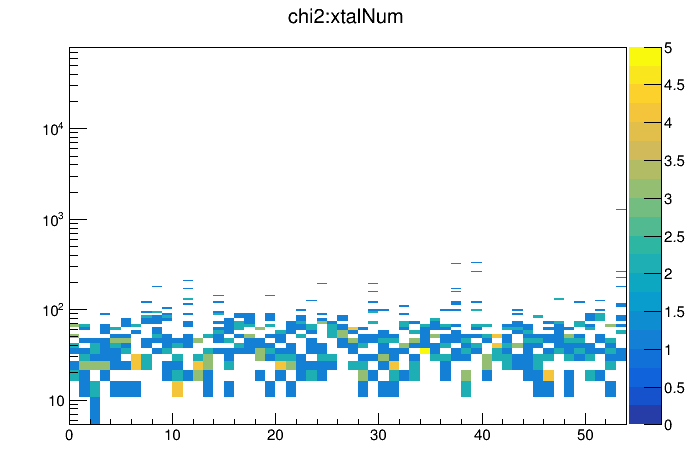

In [164]:
c = r.TCanvas()
t.Draw("chi2:xtalNum>>hist(54,0,54,15000,0,80000)","","colz")
c.SetLogy()
c.Draw()